fill DataFrame:
     Result  Above_2.5  Total Goals  \
0         0          1            6   
1         2          1            7   
2         0          1            4   
3         0          0            0   
4         1          0            1   
..      ...        ...          ...   
813       1          1            3   
814       1          0            2   
815       2          1            3   
816       2          1            3   
817       2          0            1   

     away_player_stats_player10_stats_season_goals  \
0                                                0   
1                                                4   
2                                                0   
3                                                0   
4                                                1   
..                                             ...   
813                                              0   
814                                              9   
815                          

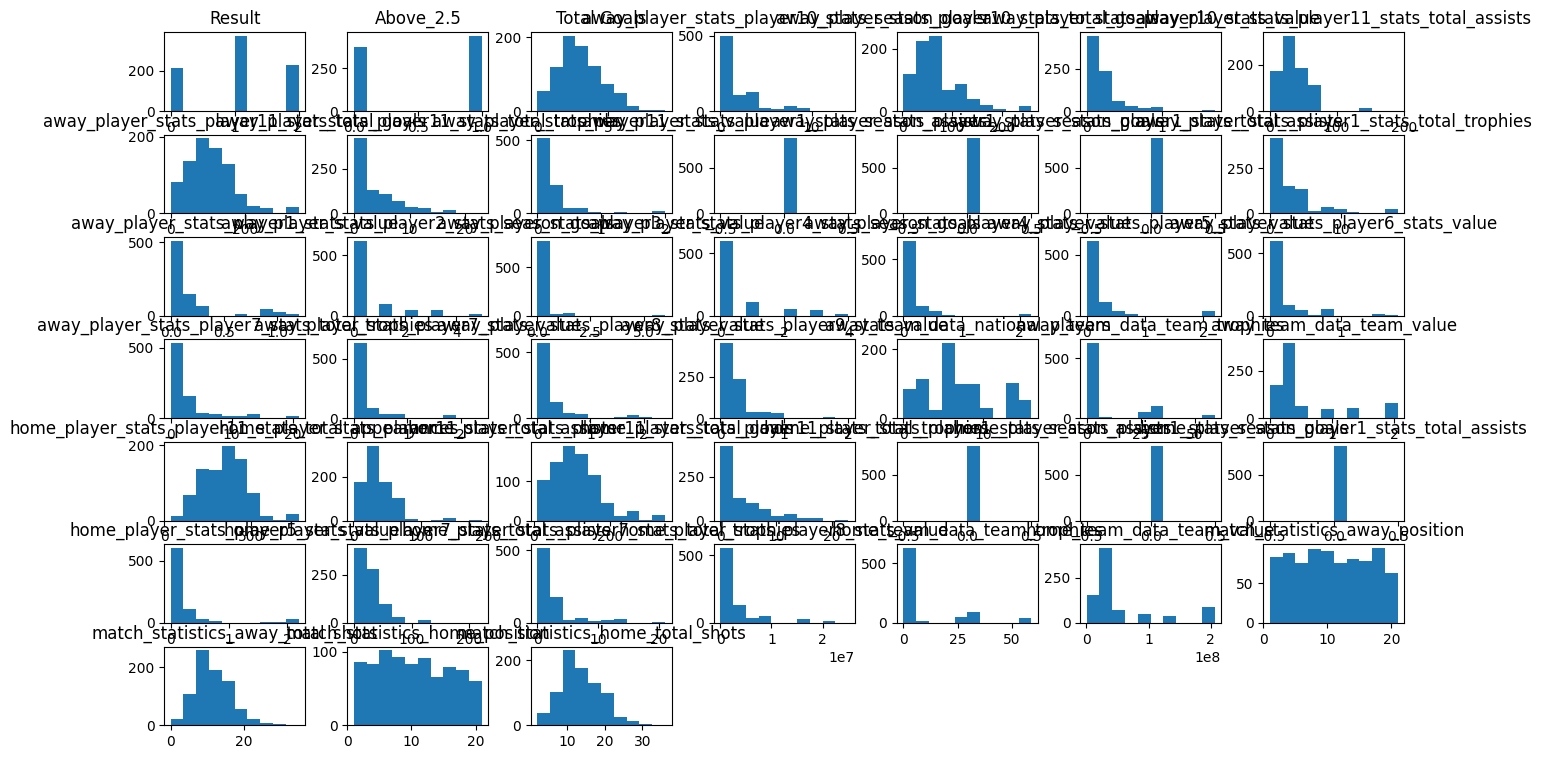

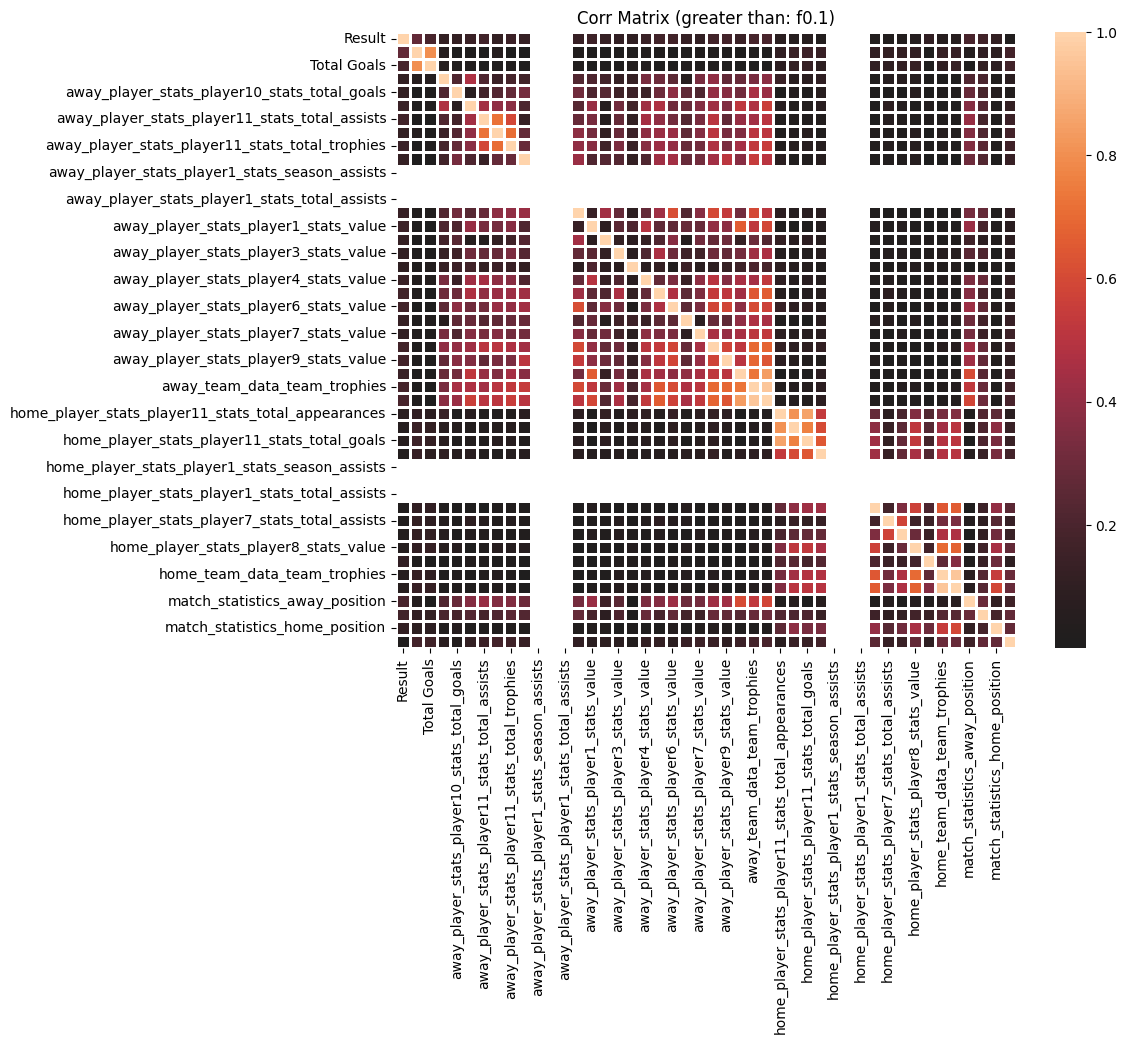

<Figure size 700x700 with 0 Axes>

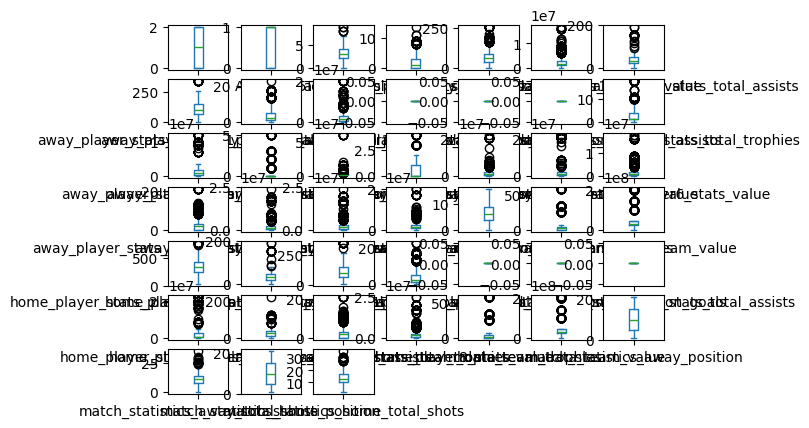

In [2]:
#---------------------------------------------------------------------------------------------------------------------------------------------------------
# 30.04.2024 - HÃ¼seyin Sezerol
#---------------------------------------------------------------------------------------------------------------------------------------------------------
# Libs
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


from sklearn.exceptions import ConvergenceWarning


from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.svm import SVC


from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import VotingClassifier

import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor


from sklearn.exceptions import ConvergenceWarning
from sklearn.metrics import confusion_matrix

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import Lars
from sklearn.linear_model import ARDRegression
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
import time
import statsmodels.api as sm

from sklearn.impute import KNNImputer



import time
warnings.filterwarnings("ignore")


df = pd.read_csv("footballmathces_v2.csv", delimiter=";" ,encoding="iso-8859-9") 
df['weather_data_condition'] = df['weather_data_condition'].astype(str)
encoded_df = pd.get_dummies(df['weather_data_condition'], prefix='w', dtype=int)
df = pd.concat([df, encoded_df], axis=1)
df.drop('weather_data_condition', axis=1, inplace=True)
df['away_team_data_average_age'] = df['away_team_data_average_age'].apply(lambda x: x.split('.')[0])
df['home_team_data_average_age'] = df['home_team_data_average_age'].apply(lambda x: x.split('.')[0])
df = df.drop(columns=["weather_data_degree","weather_data_wspeed"])
data = df

correlation_matrix = data.corr()

correlation_with_target1 = correlation_matrix['Result'].abs().sort_values(ascending=False)
correlation_with_target2 = correlation_matrix['Above_2.5'].abs().sort_values(ascending=False)
correlation_with_target3 = correlation_matrix['Total Goals'].abs().sort_values(ascending=False)

threshold = 0.1

columns_to_drop_target1 = correlation_with_target1[correlation_with_target1 < threshold].index
columns_to_drop_target2 = correlation_with_target2[correlation_with_target2 < threshold].index
columns_to_drop_target3 = correlation_with_target3[correlation_with_target3 < threshold].index

columns_to_drop = set(columns_to_drop_target1).intersection(columns_to_drop_target2)
columns_to_drop = set(columns_to_drop).intersection(columns_to_drop_target3)

df_filtered = data.drop(columns=columns_to_drop)
print("fill DataFrame:")
print(df_filtered)
df_filtered.to_csv("06_Football_Dataset.csv", index=False)

df_filtered.hist(bins=10,figsize=(16,9),grid=False)

plt.figure(figsize=(10, 8))
corr2=np.abs(df_filtered.corr(method='pearson'))
sns.heatmap(corr2, annot=False, fmt=".2f", linewidths=0.9, center=0)
plt.title(f"Corr Matrix (greater than: f{threshold})")

plt.figure(figsize=(7, 7))
df_filtered.plot(kind='box', subplots=True, layout=(7,7), sharex=False, sharey=False)

# Build Best Classification Model
datas=pd.read_csv('06_Football_Dataset.csv')
inputs = datas.iloc[:,3:]
output_class = datas.iloc[:,:2]
output_reg = datas.iloc[:,2]
#classification
print('classification')
for index in range(0,2):
    filename=output_class.iloc[:,index].name
    print(output_class.iloc[:,index].name)
   
    # Separate data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(inputs, output_class.iloc[:,index], test_size=0.2,train_size=0.8, random_state=47,shuffle=True)

    #Loading the models to be tried
    models = []
    
    models.append(('DT', DecisionTreeClassifier()))
    models.append(('ExtraT', ExtraTreesClassifier()))
    models.append(('RndFor', RandomForestClassifier()))
    
    models.append(('KNN', KNeighborsClassifier()))
    models.append(('MLP',MLPClassifier()))
    models.append(('GaussNB',GaussianNB()))
    
    models.append(('AdaBoost',AdaBoostClassifier()))
    models.append(('GRBoost',GradientBoostingClassifier()))
    
    models.append(('GaussPC',GaussianProcessClassifier()))
    
    models.append(('LogisR', LogisticRegression()))
    
   # models.append(('sgd',SGDClassifier()))
    
    
    #models.append(( 'histgb',HistGradientBoostingClassifier()))

    #SVR
    #models.append(('SVC-Linear', SVC(kernel="linear")))
    #models.append(('SVC-RBF', SVC(kernel='rbf')))
    #models.append(('SVC-Sigmoid', SVC(kernel="sigmoid")))
    #models.append(('SVC-Poly2', SVC(kernel="poly",degree=2)))
    #models.append(('SVC-Poly3', SVC(kernel="poly",degree=3)))
    
    #ANN
    #models.append(('ANN-lbfgs',MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(20,10,5), random_state=7)))
    #models.append(('ANN-sgd',MLPClassifier(solver='sgd', alpha=1e-5,hidden_layer_sizes=(20,10,5), random_state=7)))
    #models.append(('ANN-adam',MLPClassifier(solver='adam', alpha=1e-5,hidden_layer_sizes=(20,10,5), random_state=7)))
    
    #Boosting
    #models.append(('xgb',xgb.XGBRegressor(verbosity=0,learning_rate = 0.01,max_depth= 5,n_estimators= 300,subsample= 0.8)))
    #models.append(('lgb',lgb.LGBMRegressor(verbose=-1)))
    #models.append(('catb',CatBoostRegressor(verbose=False)))
    
    #Testing models------------------------------------------------------------------------------
    num_folds = 10
    results = {}

    start_time0 = time.time()
    for name, model in models:
        start_time = time.time()
        
        skfold = StratifiedKFold(n_splits=num_folds,shuffle=True,random_state=47)
        cv_results = cross_val_score(model, x_train, y_train, cv=skfold, scoring="accuracy")
        
        mean_accuracy = cv_results.mean()
        
        model.fit(x_train, y_train)
        test_accuracy = model.score(x_test, y_test)
        results[name] = test_accuracy
        
        
        print(f"{name} CV - acc :  {mean_accuracy:.16f}")
        print(f"{name} test-acc :  {test_accuracy:.16f}")
        
       
        end_time = time.time();elapsed_time = end_time - start_time;print(f"{name.ljust(8)}: {elapsed_time} saniye\n")
        
    end_time0 = time.time();elapsed_time = end_time0 - start_time0;print(f"{elapsed_time} saniye")
        

    print("\n")
    print(filename)
    best_model = max(results, key=results.get)
    print("best dependOnTest: ", best_model)


    models_dict = dict(models)
    # Train the best model
    best_model_instance = models_dict.get(best_model)
    best_model_instance.fit(x_train, y_train)

    # Evaluate the performance of the best model on the test set
    test_accuracy = best_model_instance.score(x_test, y_test)
    print("Test set test-acc (best model):", test_accuracy)

    # Calculate evaluation metrics for the best model
    y_pred = best_model_instance.predict(x_test)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    # Print the evaluation metrics for the best model
    print("\nEvaluation metric scores for best model which is {}:".format(best_model))
    print("Test set accuracy:", test_accuracy)
    print("Test set precision:", precision)
    print("Test set recall:", recall)
    print("Test set F1 score:", f1)
 
    import pickle

    # En iyi modeli seç
    best_model = max(results, key=results.get)
    print("Best model:", best_model)

    # En iyi modelin örneğini al
    best_model_instance = models_dict.get(best_model)

    # Modeli kaydet
    with open(f'{filename}best_model.pkl', 'wb') as f:
        pickle.dump(best_model_instance, f)

    print("\n")



#Regression
print('Regression')
# ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")
# Separate data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(inputs, output_reg, test_size=0.2,train_size=0.8, random_state=47,shuffle=True)

sc=StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)


#Loading the models to be tried
models = []
models.append(('LR', LinearRegression()))
models.append(('gaus', GaussianProcessRegressor( random_state=47)))

models.append(('ridge', RidgeCV()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet(alpha=2.5, l1_ratio=0.1, max_iter=1000,selection= 'random', tol=0.0001, random_state=47,warm_start= True)))
models.append(('KNN', KNeighborsRegressor()))

models.append(('DT', DecisionTreeRegressor(random_state=47)))
models.append(('ExtraT', ExtraTreesRegressor(max_features=1.0,n_estimators=120, max_depth=9, min_samples_split=2,min_samples_leaf=1, random_state=47)))
models.append(('Ada',AdaBoostRegressor(base_estimator= DecisionTreeRegressor(max_depth=5), learning_rate=0.1, n_estimators= 100, random_state=42)))
models.append(('Graboost',GradientBoostingRegressor(n_estimators=150, max_depth=3, learning_rate=0.1, min_samples_split= 10,min_samples_leaf= 1, max_features= None,random_state=47)))

models.append(('ard',ARDRegression()))
models.append(('sgd',SGDRegressor(max_iter=1000, tol=1e-3)))

#models.append(('lars',Lars()))
#models.append(( 'histgb',HistGradientBoostingRegressor()))

#Voting
#models.append(('vote',VotingRegressor(estimators=[('a',HistGradientBoostingRegressor()), ('b',ExtraTreesRegressor(n_estimators=200, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)),('c',GradientBoostingRegressor(n_estimators=150, max_depth=3, learning_rate=0.1,  min_samples_split= 10,min_samples_leaf= 1,  max_features= None,random_state=42)),('d',DecisionTreeRegressor(criterion='friedman_mse', max_depth =10, min_samples_leaf= 2,max_features= None,min_weight_fraction_leaf=0, min_samples_split= 2,splitter= 'random',random_state=42))])))

#SVR
models.append(('SVR-Linear', SVR(kernel="linear")))
models.append(('SVR-RBF', SVR(kernel='rbf')))
models.append(('SVR-Sigmoid', SVR(kernel="sigmoid")))
models.append(('SVR-Poly2', SVR(kernel="poly",degree=2)))
models.append(('SVR-Poly3', SVR(kernel="poly",degree=3)))

#ANN
models.append(('ANN-lbfgs',MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(20,10,5), random_state=7)))
models.append(('ANN-sgd',MLPRegressor(solver='sgd', alpha=1e-5,hidden_layer_sizes=(20,10,5), random_state=7)))
models.append(('ANN-adam',MLPRegressor(solver='adam', alpha=1e-5,hidden_layer_sizes=(20,10,5), random_state=7)))

#Boosting
models.append(('xgb',xgb.XGBRegressor(verbosity=0,learning_rate = 0.01,max_depth= 5,n_estimators= 300,subsample= 0.8)))
models.append(('lgb',lgb.LGBMRegressor(verbose=-1)))
models.append(('catb',CatBoostRegressor(verbose=False)))

#Testing models
num_folds = 10
results = {}

start_time0 = time.time()
for name, model in models:
    start_time = time.time()
    
    kfold = KFold(n_splits=num_folds,shuffle=True,random_state=47)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="r2")
    
    mean_r2score = cv_results.mean()
    
    model.fit(X_train, y_train)
    test_r2score = model.score(X_test, y_test)
    results[name] = test_r2score
    
    
    print(f"{name} CV - r2score :  {mean_r2score:.16f}")
    print(f"{name} test-r2score :  {test_r2score:.16f}")
    
   
    end_time = time.time();elapsed_time = end_time - start_time;print(f"{name.ljust(8)}: {elapsed_time} saniye\n")
    
end_time0 = time.time();elapsed_time = end_time0 - start_time0;print(f"{elapsed_time} saniye")
    


best_model = max(results, key=results.get)
print("\nbest dependOnTest: ", best_model)


models_dict = dict(models)
# Train the best model
best_model_instance = models_dict.get(best_model)
best_model_instance.fit(X_train, y_train)

# Evaluate the performance of the best model on the test set
test_r2score = best_model_instance.score(X_test, y_test)
print("Test set r2 score (best model):", test_r2score)

# Calculate evaluation metrics for the best model
y_pred = best_model_instance.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

# Print the evaluation metrics for the best model
print("\nEvaluation metric scores for best model which is {}:".format(best_model))
print("Test set r2:", test_r2score)
print("Test set MSE (Mean Squared Error):", mse)
print("Test set MAE (Mean Absolute Error):", mae)

import pickle


best_model = max(results, key=results.get)
print("Best model:", best_model)


best_model_instance = models_dict.get(best_model)


with open('best_model.pkl', 'wb') as f:
    pickle.dump(best_model_instance, f)